# Capstone Project

# The next store location for Decathlon in Delhi

Decathlon is a French sporting goods retailer. With over 1,500 stores in 57 countries, it is the largest sporting goods retailer in the world. Its holding company was formerly known as Oxylane. In 2017, the company posted a total revenue of US $ 12.8 billion.

Decathlon has been rapidly expanding in many countries. At present, Decathlon has opened more than 50 stores across India, with about 4 stores in Delhi itself. As per an news article published in 2014, Decathlon has an ambition of opening 100 stores in India.

India has a huge middle class and it is infact growing at a rapid pace. India's middle and upper class in Tier 1 cities is estimated to be around 57% and is estimated to increase to about 85% in 2030. Aspirational brands like Decathlon sees a great opportunity in this market.

Problem- Decathlon has 4 stores in Delhi presently. The plan is to open a fifth store but a decision needs to be taken about the location. The location of the new store needs to be a already popular destination where -people visit in large number.

Analysis- In this assignment a simple approach has been adopted. From wikipedia, a list of shopping malls in Delhi has been compiled. A separate list of the existing Decathlon store locations have been marked. The coordinates for the shopping malls and the stores are retrieved using geocoders. Using a KMeans clustering approach,  the city has been categorized into 4 clusters. Based on the distance of the centroids to the existing stores, a store location has been recommended. The algorithm uses 2 simple principles to determine the next store location- 1. It should be a popular locality where shopping malls exist 2. It should be far from the existing stores



In [5]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
import json # library to handle JSON files
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline

# import k-means from clustering stage
from sklearn.cluster import KMeans


import folium # map rendering library

import seaborn as sns

Data Source of New Delhi Malls- https://en.wikipedia.org/wiki/List_of_shopping_malls_in_India#Delhi

The list of shopping malls in New Delhi

In [6]:
#Loading list of shopping malls and localities in Delhi
df_mall=pd.read_excel("Delhishopping.xlsx")
df_mall.head()

,Name,Location,Year,Size (gross leasable area)
0,"Ambience Mall, Vasant Kunj",Vasant Kunj,2008,"1,200,000 sq ft (110,000 m2)"
1,Vegas Mall,"Sector-14, Dwarka",2019,"650,000 sq ft (60,000 m2)"
2,"Parsvnath Mall, Azadpur",Azadpur metro station,2005,"600,000 sq ft (56,000 m2)"
3,Select Citywalk,"Sector-6, Pushp Vihar, Saket",2007,"600,000 sq ft (56,000 m2)"
4,"Pacific Mall, Tagore Garden","Tagore Garden, Subhash Nagar",2011,"600,000 sq ft (56,000 m2)"


In [7]:
#Retrieving latitude and longitude for each shopping mall location
df_mall['Latitude']=0.0
df_mall['Longitude']=0.0

for i in range(len(df_mall)):
    address = df_mall['Location'][i]
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    df_mall['Latitude'][i]= location.latitude
    df_mall['Longitude'][i] = location.longitude


C:\Users\priya\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [8]:
df_mall.head()

,Name,Location,Year,Size (gross leasable area),Latitude,Longitude
0,"Ambience Mall, Vasant Kunj",Vasant Kunj,2008,"1,200,000 sq ft (110,000 m2)",28.529249,77.154134
1,Vegas Mall,"Sector-14, Dwarka",2019,"650,000 sq ft (60,000 m2)",28.604197,77.029238
2,"Parsvnath Mall, Azadpur",Azadpur metro station,2005,"600,000 sq ft (56,000 m2)",28.710353,77.175901
3,Select Citywalk,"Sector-6, Pushp Vihar, Saket",2007,"600,000 sq ft (56,000 m2)",28.527903,77.226713
4,"Pacific Mall, Tagore Garden","Tagore Garden, Subhash Nagar",2011,"600,000 sq ft (56,000 m2)",28.643764,77.112845


In [9]:
df_mall.drop(axis=1,labels=['Year','Size (gross leasable area)'])#Dropping columns not required

,Name,Location,Latitude,Longitude
0,"Ambience Mall, Vasant Kunj",Vasant Kunj,28.529249,77.154134
1,Vegas Mall,"Sector-14, Dwarka",28.604197,77.029238
2,"Parsvnath Mall, Azadpur",Azadpur metro station,28.710353,77.175901
3,Select Citywalk,"Sector-6, Pushp Vihar, Saket",28.527903,77.226713
4,"Pacific Mall, Tagore Garden","Tagore Garden, Subhash Nagar",28.643764,77.112845
5,Moments Mall,Kirti Nagar,28.653281,77.141773
6,DLF Avenue (Formerly DLF Place),"Sector-6, Pushp Vihar, Saket",28.527903,77.226713
7,"Unity One, Janakpuri",Janakpuri,28.621927,77.087476
8,DLF Promenade,Vasant Kunj,28.529249,77.154134
9,MGF City Square,"Shivaji Place, Rajouri Garden",28.647980,77.119651


### Exploratory Data Analysis

In [39]:
df_mall.describe()#Range of Data

,Latitude,Longitude,Zone
count,40.000000,40.000000,40.000000
mean,28.632681,77.159411,0.900000
std,0.069833,0.069068,1.057331
min,28.527903,77.029238,0.000000
25%,28.551420,77.117074,0.000000
50%,28.647980,77.152640,1.000000
75%,28.696052,77.198090,1.250000
max,28.717453,77.294960,3.000000


In [50]:
df_mall.isnull().sum()#Searching Nan values

Name                          0
Location                      0
Year                          4
Size (gross leasable area)    0
Latitude                      0
Longitude                     0
Zone                          0
dtype: int64

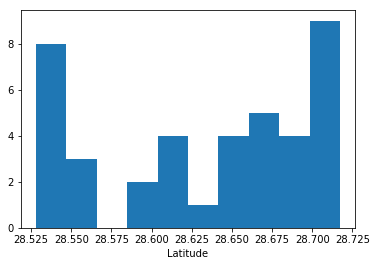

In [45]:
plt.hist(df_mall['Latitude'],bins=10)
plt.xlabel("Latitude")
plt.show()

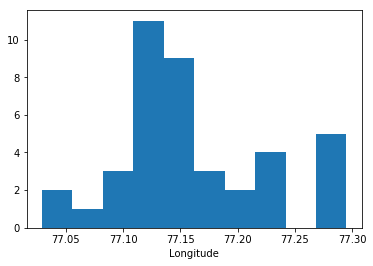

In [46]:
plt.hist(df_mall['Longitude'],bins=10)
plt.xlabel("Longitude")
plt.show()

Data Source of Decathlon stores in Delhi-https://www.tiendeo.in/stores/delhi/decathlon (all Decathlon stores in Noida/Gurgaon and other suburbs removed, only stores with Delhi pincode kept)

In [10]:
# Loading Decathlon stores in Delhi

df_dec=pd.read_excel('Decathlonstores.xlsx')
df_dec

,Store,Address
0,Decathlon Khelgaon,Khel Gaon New Delhi
1,Decathlon CBD Shahdara,Shahdara
2,Decathlon Tagor Garden,"Tagore Garden,Najafgarh"
3,Decathlon Rohini,"Rohini,New Delhi"


In [11]:
#Retrieving latitude and longitude for each Decathlon store in Delhi
df_dec['Latitude']=0.0
df_dec['Longitude']=0.0

for i in range(len(df_dec)):
    address = df_dec['Address'][i]
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    df_dec['Latitude'][i]= location.latitude
    df_dec['Longitude'][i] = location.longitude


C:\Users\priya\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [12]:
df_dec

,Store,Address,Latitude,Longitude
0,Decathlon Khelgaon,Khel Gaon New Delhi,28.606650,77.274260
1,Decathlon CBD Shahdara,Shahdara,28.673333,77.289025
2,Decathlon Tagor Garden,"Tagore Garden,Najafgarh",28.643764,77.112845
3,Decathlon Rohini,"Rohini,New Delhi",28.716209,77.117074


In [13]:
## Define Foursquare Credentials and Version
CLIENT_ID = 'C1234YKDBU4MJXK4VMFECES2LWADFY0T2LAO1DNPBZGK2OVM' # Foursquare ID
CLIENT_SECRET = 'ZAMTYDLB44C2ZCCZLHI5ADWSTZQA1TRPCWYBYHGAQJUAT3LF' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: C1234YKDBU4MJXK4VMFECES2LWADFY0T2LAO1DNPBZGK2OVM
CLIENT_SECRET:ZAMTYDLB44C2ZCCZLHI5ADWSTZQA1TRPCWYBYHGAQJUAT3LF


In [14]:
def getNearbyVenues(names, latitudes, longitudes, radius=5000,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [15]:
#Find geographical coordinates of Delhi
address = 'New Delhi, IN'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latt = location.latitude
long = location.longitude
print('The geograpical coordinate of New Delhi are {}, {}.'.format(latt, long))

The geograpical coordinate of New Delhi are 28.6138954, 77.2090057.


In [53]:
#Plotting location of Shopping malls and Decathlon stores on a Delhi map
map_delhi = folium.Map(location=[latt, long], zoom_start=10)

# Plot all shopping malls of New Delhi on the map (Blue dots)
for lat, lng, label in zip(df_mall['Latitude'], df_mall['Longitude'], df_mall['Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_delhi)

# Plot all Decathlon Stores in New Delhi on the map (Red dots)
for lat, lng, label in zip(df_dec['Latitude'], df_dec['Longitude'], df_dec['Store ']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='red',
        fill=True,
        fill_color='white',
        fill_opacity=0.9,
        parse_html=False).add_to(map_delhi) 
# add markers to map

    
map_delhi

In [17]:
#Dividing Delhi into 4 clusters based on the location of shopping malls
km=KMeans(n_clusters=4,random_state=0)
y_pred=km.fit_predict(df_mall[['Latitude','Longitude']])

In [18]:
df_mall['Zone']=y_pred

In [56]:
df_mall.drop(axis=1,labels=['Year','Size (gross leasable area)'])

,Name,Location,Latitude,Longitude,Zone
0,"Ambience Mall, Vasant Kunj",Vasant Kunj,28.529249,77.154134,1
1,Vegas Mall,"Sector-14, Dwarka",28.604197,77.029238,2
2,"Parsvnath Mall, Azadpur",Azadpur metro station,28.710353,77.175901,0
3,Select Citywalk,"Sector-6, Pushp Vihar, Saket",28.527903,77.226713,1
4,"Pacific Mall, Tagore Garden","Tagore Garden, Subhash Nagar",28.643764,77.112845,0
5,Moments Mall,Kirti Nagar,28.653281,77.141773,0
6,DLF Avenue (Formerly DLF Place),"Sector-6, Pushp Vihar, Saket",28.527903,77.226713,1
7,"Unity One, Janakpuri",Janakpuri,28.621927,77.087476,2
8,DLF Promenade,Vasant Kunj,28.529249,77.154134,1
9,MGF City Square,"Shivaji Place, Rajouri Garden",28.647980,77.119651,0


In [20]:
#Dividing the dataset into 4 dataframes based on the predicted cluster
df_mall0= df_mall[(df_mall['Zone']==0)]
df_mall1= df_mall[(df_mall['Zone']==1)]
df_mall2= df_mall[(df_mall['Zone']==2)]
df_mall3= df_mall[(df_mall['Zone']==3)]


In [21]:
#Plotting all the Decathlon stores and the different shopping clusters with distinct colors
map_delhi = folium.Map(location=[latt, long], zoom_start=11.1)

# Plot all shopping malls of New Delhi on the map (different colors based on cluster)
for lat, lng, label in zip(df_mall0['Latitude'], df_mall0['Longitude'], df_mall0['Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='yellow',
        fill=True,
        fill_color='yellow',
        fill_opacity=0.7,
        parse_html=False).add_to(map_delhi)

for lat, lng, label in zip(df_mall1['Latitude'], df_mall1['Longitude'], df_mall1['Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7,
        parse_html=False).add_to(map_delhi)
    
for lat, lng, label in zip(df_mall2['Latitude'], df_mall2['Longitude'], df_mall2['Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=0.7,
        parse_html=False).add_to(map_delhi)
    
for lat, lng, label in zip(df_mall3['Latitude'], df_mall3['Longitude'], df_mall3['Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='gray',
        fill=True,
        fill_color='gray',
        fill_opacity=0.7,
        parse_html=False).add_to(map_delhi)
    


# Plot all Decathlon Stores in New Delhi on the map (Red dots)
for lat, lng, label in zip(df_dec['Latitude'], df_dec['Longitude'], df_dec['Store ']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='red',
        fill=True,
        fill_color='white',
        fill_opacity=0.9,
        parse_html=False).add_to(map_delhi) 
# add markers to map

    
map_delhi

In [22]:
#Centroids of the 4 clusters
centroids = km.cluster_centers_
print(centroids)

[[28.69111491 77.13509586]
 [28.53966315 77.1868041 ]
 [28.59842046 77.06072112]
 [28.64952837 77.29023249]]


In [23]:
#Distance index (It is not real eucledean distance-- using lat long of the centroids and existing stores)
df_sum=df_dec
df_sum['Zone0']=0.0
df_sum['Zone1']=0.0
df_sum['Zone2']=0.0
df_sum['Zone3']=0.0
for i in range(len(df_dec)):
    df_sum['Zone0'][i]= (((df_sum['Latitude'][i]-centroids[0][0])**2)+((df_sum['Longitude'][i]-centroids[0][1])**2))**0.5
    df_sum['Zone1'][i]= (((df_sum['Latitude'][i]-centroids[1][0])**2)+((df_sum['Longitude'][i]-centroids[1][1])**2))**0.5
    df_sum['Zone2'][i]= (((df_sum['Latitude'][i]-centroids[2][0])**2)+((df_sum['Longitude'][i]-centroids[2][1])**2))**0.5
    df_sum['Zone3'][i]= (((df_sum['Latitude'][i]-centroids[3][0])**2)+((df_sum['Longitude'][i]-centroids[3][1])**2))**0.5

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel_launcher.py:11

In [24]:
df_sum
# This table shows distance index from centroids of each cluster to existing stores

,Store,Address,Latitude,Longitude,Zone0,Zone1,Zone2,Zone3
0,Decathlon Khelgaon,Khel Gaon New Delhi,28.606650,77.274260,0.162791,0.110163,0.213698,0.045756
1,Decathlon CBD Shahdara,Shahdara,28.673333,77.289025,0.154953,0.168276,0.240280,0.023836
2,Decathlon Tagor Garden,"Tagore Garden,Najafgarh",28.643764,77.112845,0.052318,0.127698,0.069087,0.177481
3,Decathlon Rohini,"Rohini,New Delhi",28.716209,77.117074,0.030895,0.189818,0.130575,0.185553


In [25]:
#Adding the distance index of existing store to find total distance of each area from the shopping clusters
dist_Zone0=df_sum.Zone0.sum()
dist_Zone1=df_sum.Zone1.sum()
dist_Zone2=df_sum.Zone2.sum()
dist_Zone3=df_sum.Zone3.sum()

In [26]:
#This shows distance index  of each zone
print('Distance index of existing stores from centroid of Zone0',dist_Zone0)
print('Distance index of existing stores from centroid of Zone1',dist_Zone1)
print('Distance index of existing stores from centroid of Zone2',dist_Zone2)
print('Distance index of existing stores from centroid of Zone3',dist_Zone3)

Distance index of existing stores from centroid of Zone0 0.4009570148164594
Distance index of existing stores from centroid of Zone1 0.5959547861357083
Distance index of existing stores from centroid of Zone2 0.6536394827307512
Distance index of existing stores from centroid of Zone3 0.4326259936771807


Text(0.5, 1.0, 'Distance_Index of existing stores from different shopping cluster')

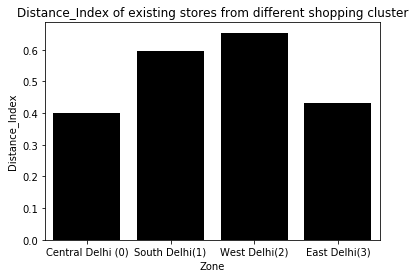

In [27]:
#Plotting all Distance Indices

sns.barplot(x=['Central Delhi (0)','South Delhi(1)','West Delhi(2)','East Delhi(3)'],y=[dist_Zone0,dist_Zone1,dist_Zone2,dist_Zone3],color='black')
plt.ylabel('Distance_Index')
plt.xlabel('Zone')
plt.title("Distance_Index of existing stores from different shopping cluster")


Based on the above result, it will be best to open a new store in Zone 2 (West Delhi) because it has the highest distance index. It is both a popular locale and farthest from the existing Decathlon stores. The second best locale is Zone 1(South Delhi).

In [30]:
# To find out what other amenities/infrastructure is there in West Delhi
new_Delhi_venues = getNearbyVenues(names=df_mall2['Location'],
                                   latitudes=df_mall2['Latitude'],
                                   longitudes=df_mall2['Longitude']
                                  )

Sector-14, Dwarka
Janakpuri
Dwarka Sector 21
Dwarka Sector 12
Janakpuri


In [31]:
new_Delhi_venues

,Locality,Locality Latitude,Locality Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Sector-14, Dwarka",28.604197,77.029238,Radisson Blu Hotel,28.596476,77.036278,Hotel
1,"Sector-14, Dwarka",28.604197,77.029238,Golds Gym,28.587997,77.071413,Gym
2,"Sector-14, Dwarka",28.604197,77.029238,ITC Welcomhotel Dwarka,28.579396,77.056092,Hotel
3,"Sector-14, Dwarka",28.604197,77.029238,I Love Dwarka,28.594282,77.071710,Hobby Shop
4,"Sector-14, Dwarka",28.604197,77.029238,Rice,28.596297,77.036204,Asian Restaurant
5,"Sector-14, Dwarka",28.604197,77.029238,McDonald's,28.603573,77.032116,Fast Food Restaurant
6,"Sector-14, Dwarka",28.604197,77.029238,Cafe Coffee Day,28.602480,77.048140,Café
7,"Sector-14, Dwarka",28.604197,77.029238,Pizza Hut,28.636335,77.062933,Pizza Place
8,"Sector-14, Dwarka",28.604197,77.029238,Barista,28.636334,77.062925,Café
9,"Sector-14, Dwarka",28.604197,77.029238,Domino's Pizza,28.619000,77.033000,Pizza Place


Based on the above result, it will be best to open a new store in Zone 2 (South Delhi) because it has the highest distance index. It is both a popular locale and farthest from the existing Decathlon stores. The second best locale is Zone 0(West Delhi).

In [32]:
surr=new_Delhi_venues['Venue Category'].value_counts()
surr

Fast Food Restaurant             42
Café                             31
Pizza Place                      30
Indian Restaurant                26
Coffee Shop                      17
Hotel                            12
Market                           11
Gym                               9
Donut Shop                        7
Shopping Mall                     7
Chinese Restaurant                7
BBQ Joint                         6
Hobby Shop                        5
Cocktail Bar                      5
Restaurant                        4
Fried Chicken Joint               4
Clothing Store                    4
Sandwich Place                    4
Multiplex                         4
Asian Restaurant                  3
Diner                             3
Airport Lounge                    3
Food Court                        3
Sculpture Garden                  2
Ice Cream Shop                    2
Italian Restaurant                2
Indian Sweet Shop                 2
Pub                         

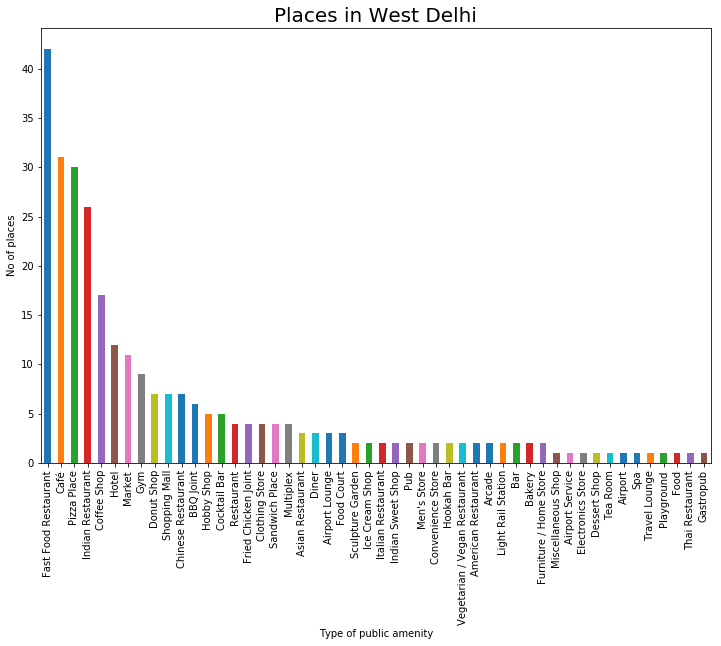

In [59]:
plt.figure(figsize=(12,8))
surr.plot(kind='bar')
plt.title("Places in West Delhi",fontsize=20)
plt.xlabel('Type of public amenity')
plt.ylabel('No of places')
plt.show()

Conclusion- Decathlon can consider setting up their next store in West Delhi. The place has a lot of amenities around